In [28]:
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [1]:
import pandas as pd

# Chemin vers les fichiers CSV
chemins = [
    "C:/Users/maxim/Downloads/interventions2008.csv",
    "C:/Users/maxim/Downloads/interventions2009.csv",
    "C:/Users/maxim/Downloads/interventions2010.csv",
    "C:/Users/maxim/Downloads/interventions2011.csv",
    "C:/Users/maxim/Downloads/interventions (1).csv",
    "C:/Users/maxim/Downloads/interventions.csv",
    "C:/Users/maxim/Downloads/interventions2014.csv",
    "C:/Users/maxim/Downloads/interventions2015.csv",
    "C:/Users/maxim/Downloads/interventions2016.csv",
    "C:/Users/maxim/Downloads/interventions2017.csv",
    "C:/Users/maxim/Downloads/interventions2018.csv",
    "C:/Users/maxim/Downloads/interventions2019.csv",
    "C:/Users/maxim/Downloads/interventions2020.csv",
    "C:/Users/maxim/Downloads/interventions2021.csv",
]

# Créer un dictionnaire de DataFrames
donnees = {}
for i, chemin in enumerate(chemins, start=2008):
    donnees[i] = pd.read_csv(chemin, sep=";", index_col=0, encoding='latin-1')


In [2]:
colonnesDatasets = {}


datasets = donnees  

for annee, dataframe in datasets.items():
    colonnesDatasets[annee] = dataframe.columns.tolist()

print(colonnesDatasets)



{2008: ['Zone', 'Région', 'Numéro', 'Département', 'Catégorie', "Feux d'habitations-bureaux", 'dont feux de cheminées', "Feux d'ERP avec local à sommeil", "Feux d'ERP sans local à sommeil", 'Feux de locaux industriels', 'Feux de locaux artisanaux', 'Feux de locaux agricoles', 'Feux sur voie publique', 'Feux de véhicules', 'Feux de végétations', 'Autres feux', 'Incendies', 'Accidents sur lieux de travail', 'Accidents à domicile', 'Accidents de sport', 'Accidents sur voie publique', 'Accidents en montagne', 'Malaises sur lieux de travail', 'Malaises à domicile : urgence vitale', 'Malaises à domicile : carence', 'Malaises en sport', 'Malaises sur voie publique', 'Autolyses', 'Noyades en piscines ou eaux intérieures', 'Noyades en mer', 'Intoxications', 'dont intoxications au CO', 'Secours à victimes', 'Relevage de personnes', 'Recherche de personnes', 'Aides à personnes', 'Secours à personnes', 'Accidents routiers', 'Accidents ferroviaires', 'Accidents aériens', 'Accidents de navigation', 

In [3]:
a = [i for i in range(2017, 2022)]
for annee, dataframe in datasets.items():
    datasets[annee] = dataframe.rename(columns={'Catégorie A': 'Catégorie'})


In [5]:
colonnesSupplémentaires = {}
for annee, dataframe in colonnesDatasets.items():
    for j in range(2008,2022):
        if annee != j:
            colonnesSupplémentaires[annee] = [colonne for colonne in dataframe if colonne not in colonnesDatasets[j]]
print(colonnesSupplémentaires)             

{2008: ['Catégorie', 'Accidents en montagne', 'Noyades en piscines ou eaux intérieures', 'Noyades en mer', 'Secours à victimes', 'Aides à personnes', 'Secours à personnes', 'fuites de gaz', 'contaminations', 'dont Téléalarmes', 'Eboulements', 'surveillances', 'Autres opération diverse'], 2009: ['Catégorie', 'Accidents en montagne', 'Noyades en piscines ou eaux intérieures', 'Noyades en mer', 'Aides à personnes', 'dont Téléalarmes', 'Eboulements'], 2010: ['Catégorie', 'Aides à personnes'], 2011: ['Catégorie'], 2012: ['Catégorie', 'Aides à personnes'], 2013: ['Catégorie'], 2014: ['Catégorie', 'dont Téléalarmes'], 2015: ['Catégorie', 'dont Téléalarmes'], 2016: ['Catégorie'], 2017: [], 2018: [], 2019: [], 2020: [], 2021: []}


In [9]:
uniformedDatasets = {}
for annee, dataframe in datasets.items():
    colonnes_a_exclure = colonnesSupplémentaires[annee]
    colonnes_a_exclure.append("Zone")
    colonnes_a_exclure.append("Région")
    colonnes_a_exclure.append("Numéro")
    colonnes_a_inclure = [colonne for colonne in dataframe.columns if colonne not in colonnes_a_exclure]
    uniformedDatasets[annee] = dataframe[colonnes_a_inclure].copy()


In [10]:
print(uniformedDatasets)

{2008:             Département Feux d'habitations-bureaux dont feux de cheminées  \
Année                                                                       
2008   Bouches-du-Rhône                        954                     42   
2008              Paris                      5 628                    119   
2008                Ain                        657                    454   
2008              Aisne                        987                    517   
2008             Allier                        659                    414   
...                 ...                        ...                    ...   
2008         Val-d'Oise                      1 436                    262   
2008         Guadeloupe                        NaN                    NaN   
2008         Martinique                        228                      0   
2008             Guyane                        125                      0   
2008            Réunion                        466                   

In [35]:
departementDatasets = {}

for annee, dataframe in uniformedDatasets.items():
    for departement in dataframe['Département'].unique():
        # Sélectionner les lignes correspondant au département
        df_departement = dataframe[dataframe['Département'] == departement].reset_index(drop=True)
        
        # Ajouter ce dataframe au dictionnaire correspondant au département
        if departement not in departementDatasets:
            departementDatasets[departement] = []
        departementDatasets[departement].append(df_departement)

departementDatasetsFusionne = {}

for departement, dataframes_list in departementDatasets.items():
    if departement not in departementDatasetsFusionne:
        departementDatasetsFusionne[departement] = pd.concat(dataframes_list, ignore_index=True)
    else:
        departementDatasetsFusionne[departement] = departementDatasetsFusionne[departement].append(dataframes_list, ignore_index=True)
    departementDatasetsFusionne[departement] = departementDatasetsFusionne[departement].drop("Département",axis=1)


departementDatasetsFusionne


{'Bouches-du-Rhône':    Feux d'habitations-bureaux dont feux de cheminées  \
 0                         954                     42   
 1                       1 409                    394   
 2                         889                     36   
 3                       1 451                    465   
 4                         NaN                    NaN   
 5                         NaN                    NaN   
 6                         NaN                    NaN   
 7                         NaN                    NaN   
 8                         NaN                    NaN   
 9                         NaN                    NaN   
 10                        NaN                    NaN   
 11                        NaN                    NaN   
 12                        557                    3.0   
 13                      1 023                  234.0   
 14                        693                   13.0   
 15                        901                  274.0   
 16        

In [36]:
departementDatasetsFusionne["Ain"]

,Feux d'habitations-bureaux,dont feux de cheminées,Feux d'ERP avec local à sommeil,Feux d'ERP sans local à sommeil,Feux de locaux industriels,Feux de locaux artisanaux,Feux de locaux agricoles,Feux sur voie publique,Feux de véhicules,Feux de végétations,...,Piquets de sécurité - surveillances,Autres opérations diverses,Aides à personne,Secours en montagne,Secours en piscines ou eaux intérieures,Secours en mer (FDSM),Autres SAV,Éboulements,dont fausses alertes DAAF,Catégorie
0,657,454,6.0,5.0,29.0,3.0,32.0,188,429,219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,735,394,0,22,39,13,30,338,503,552,...,42,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1290,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1 628,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,634,295.0,30,1,48,23,4,388,447,347,...,0,779,1 987,1,24,0,1 016,11.0,NaN,NaN
7,687,278.0,31,6,67,44,5,473,474,812,...,0,1 019,2 183,0,29,0,1 184,12.0,NaN,NaN
8,726,303,19,2,53,26,2,412,495,499,...,0,963,2 435,0,29,0,1 303,8.0,0,NaN
9,726,285,0,36,63,32,17,571,495,727,...,0,1 344,2 386,3,27,0,1 452,13.0,0,B


<Axes: >

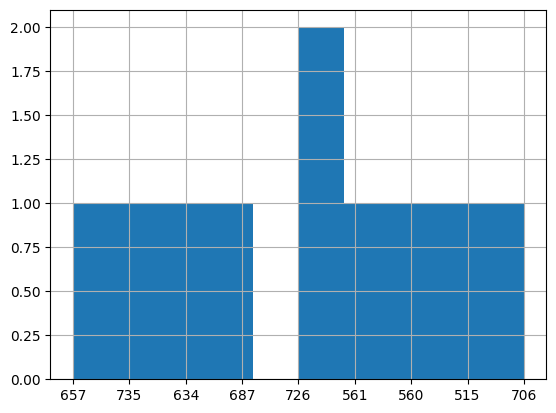

In [38]:
departementDatasetsFusionne["Ain"]["Feux d'habitations-bureaux"].hist()

In [47]:
for colonne, dataframe in departementDatasetsFusionne.items():
    for i in dataframe.columns():
        sns.scatterplot(data=departementDatasetsFusionne["Ain"][i])
plt.show()

TypeError: 'Index' object is not callable

Variance expliquée par chaque composante principale:
[0.51334122 0.48665878]

Variance expliquée cumulée:
[0.51334122 1.        ]


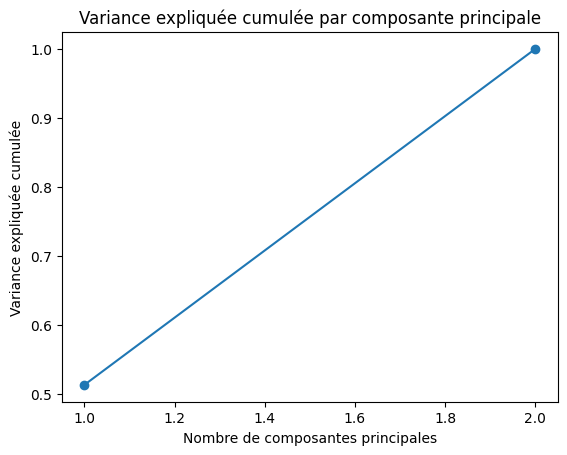

In [49]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Supposons que votre dataframe contient toutes les données que vous souhaitez inclure dans l'ACP
# Vous pouvez remplacer 'Ain' par le nom de votre département
df_all_data = departementDatasetsFusionne['Ain']

# Sélectionner les colonnes numériques pour l'ACP
data_for_pca = df_all_data.select_dtypes(include=['float64', 'int64'])

# Imputer les valeurs manquantes avec la moyenne (vous pouvez ajuster cela en fonction de vos besoins)
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data_for_pca), columns=data_for_pca.columns)

# Standardiser les données (important pour l'ACP)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Appliquer l'ACP
pca = PCA()
pca_result = pca.fit_transform(data_scaled)

# Créer un dataframe avec les résultats de l'ACP
df_pca_result = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

# Afficher la variance expliquée par chaque composante principale
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

print("Variance expliquée par chaque composante principale:")
print(explained_variance_ratio)

print("\nVariance expliquée cumulée:")
print(cumulative_explained_variance)

# Visualiser la variance expliquée cumulée
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.title('Variance expliquée cumulée par composante principale')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')
plt.show()
